In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from scipy import signal

In [10]:
def create_sawtooth(noise_level, offset):
    x = np.linspace(0,1,12000)
    noise = np.random.normal(0,1, 12000)
    return signal.sawtooth(2 * np.pi * 600 * x) + noise_level*noise + offset

In [11]:
def create_sine(time_len, freq, amplitude, noise_level, offset):
    x = np.linspace(0, freq * np.pi, 50)
    noise = np.random.normal(0,1, time_len)
    return amplitude*np.sin(np.tile(x, int(time_len/50))) + noise_level*noise + offset

## Parameter

In [12]:
noise_level_sawtooth = 0.3 
noise_level_sinus = 0.6

## Create Sinus and Sawtooth Singal with Gausian Noise

In [13]:
# Create Sine Wave
sinewave = create_sine(12000, 2, 10, noise_level_sinus, 0)
sawtooth = create_sawtooth(noise_level_sawtooth, 0)
time = range(len(sinewave))

# Save Sine Wave as .csv
df = pd.DataFrame(data={"ID":time, "sine_signal":sinewave})
df["sawtooth_signal"] = sawtooth
df.to_csv("./artifical_2_signals.csv", index=False, sep=",")

## Create Sinus Curve with several Errors
Errors will be:
- a higher level of noise
- an increase in sinusoidal amplitude
- a higher frequency
- a lower frequency
- an offset
- the interruption of the signal.

In [14]:
# Create Signal with errors
sine_with_error = []

#no error
sine_with_error.append(create_sine(10250, 2, 10, noise_level_sinus, 0))

# higher level of noise
sine_with_error.append(create_sine(50, 2, 10, 3, 0))

# no error
sine_with_error.append(create_sine(150, 2, 10, noise_level_sinus, 0))

# increase in amplitude
sine_with_error.append(create_sine(50, 2, 14, noise_level_sinus, 0))

# no error
sine_with_error.append(create_sine(250, 2, 10, noise_level_sinus, 0))

# igher frequency 
sine_with_error.append(create_sine(100, 4, 10, noise_level_sinus, 0))

# no error
sine_with_error.append(create_sine(300, 2, 10, noise_level_sinus, 0))

# lower frequency 
sine_with_error.append(create_sine(150, 1, 10, noise_level_sinus, 0))

# no error
sine_with_error.append(create_sine(200, 2, 10, noise_level_sinus, 0))

# offset
sine_with_error.append(create_sine(150, 2, 10, noise_level_sinus, 5))

# no error
sine_with_error.append(create_sine(50, 2, 10, noise_level_sinus, 0))

# no signal
sine_with_error.append(np.zeros(100))

# no error
sine_with_error.append(create_sine(200, 2, 10, noise_level_sinus, 0))

# Concatenate intervals to one signal 
signal_sine = []
# Plot Sine Wave
for i in sine_with_error:
    signal_sine = np.concatenate((signal_sine, i), axis=None)
time = range(len(signal_sine))

In [15]:
sawtooth = create_sawtooth(noise_level_sawtooth, 0)

## Add Label

In [16]:
l1 = [0]*10250
l2 = [1]*50
l3 = [0]*150
l4 = [1]*50
l5 = [0]*250
l6 = [1]*100
l7 = [0]*300
l8 = [1]*150
l9 = [0]*200
l10 = [1]*150
l11 = [0]*50
l12 = [1]*100
l13 = [0]*200

In [17]:
label = l1+l2+l3+l4+l5+l6+l7+l8+l9+l10+l11+l12+l13
print(len(label))

12000


In [22]:
df = pd.DataFrame(data={"ID":time, "sine_signal":signal_sine})
df["sawtooth_signal"] = sawtooth
df["anomaly"] = label
df.head()

,ID,sine_signal,sawtooth_signal,anomaly
0,0,0.929679,-0.971575,0
1,1,1.098269,-1.110683,0
2,2,2.043988,-1.221397,0
3,3,3.829501,-0.451777,0
4,4,4.614504,-0.313680,0


In [23]:
subset = df.iloc[10000:,:]

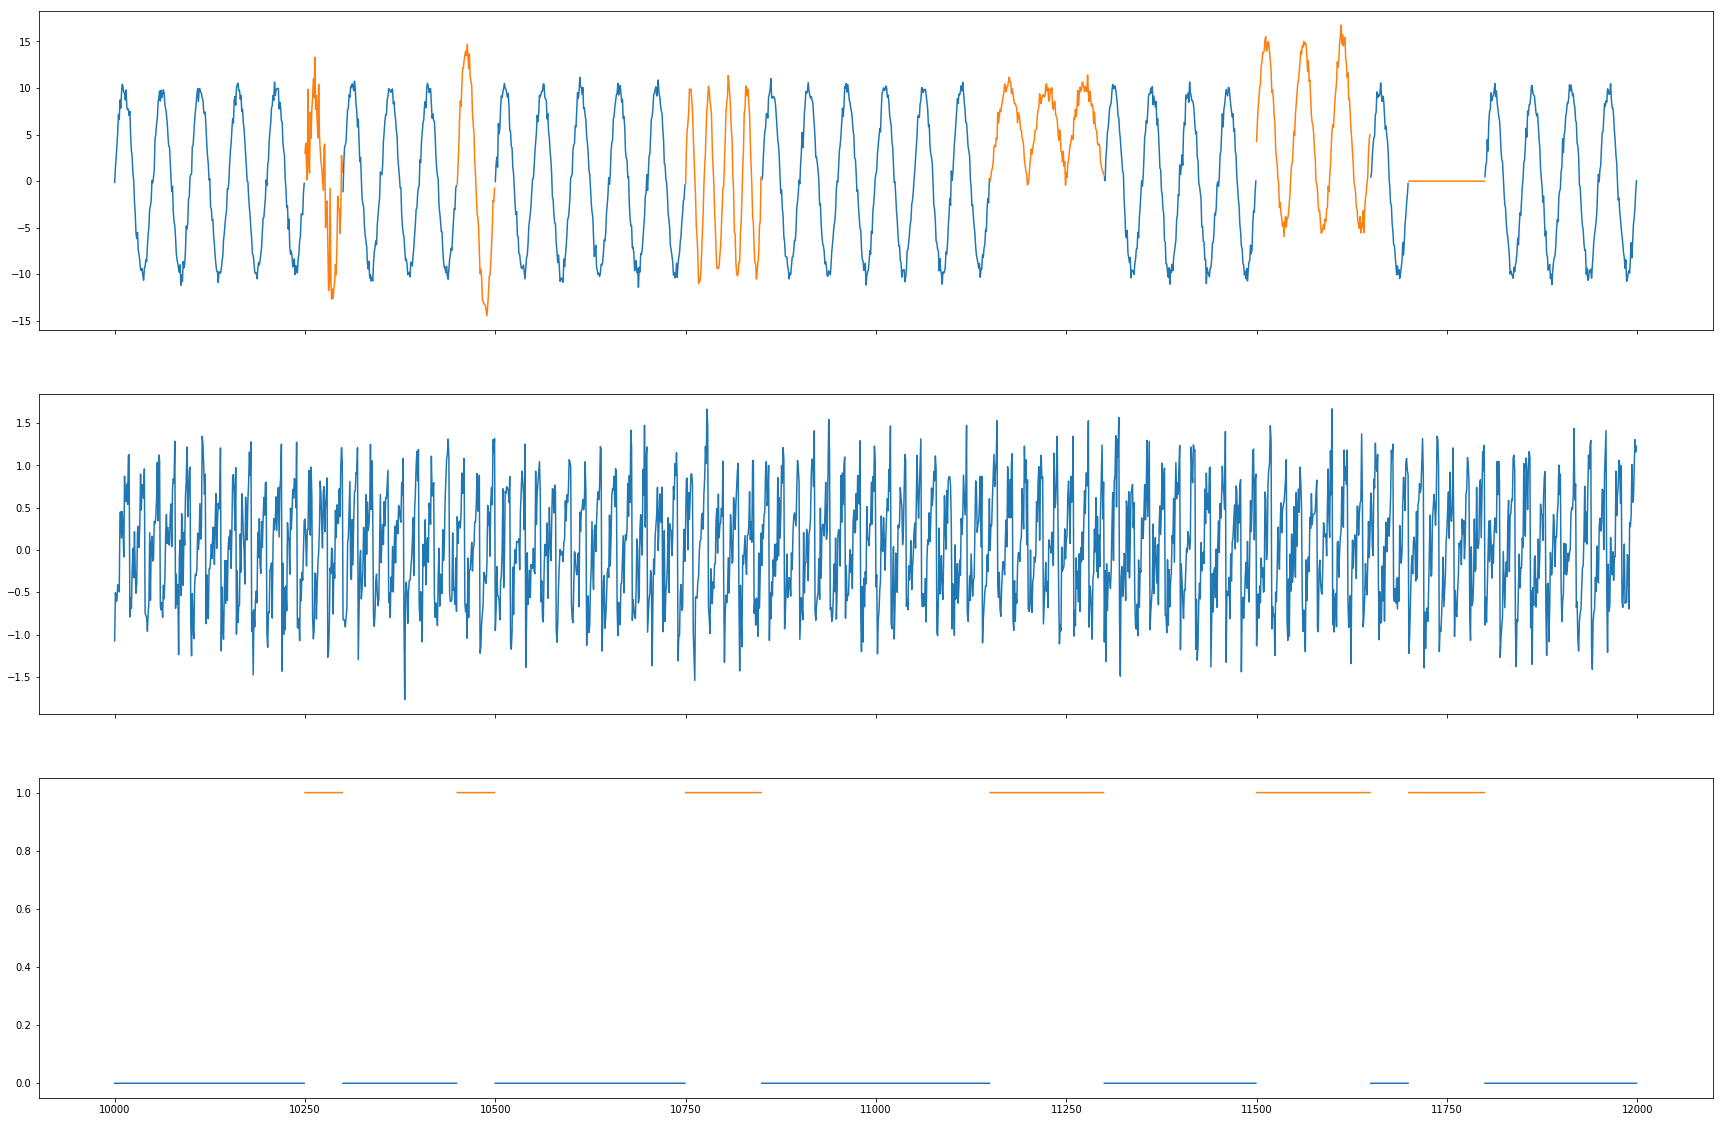

In [37]:
fig, axes = plt.subplots(3, 1, figsize=(30,20), sharex=True) # , dpi=200, 
ax = axes.ravel()
time = subset["ID"].values
sine = subset["sine_signal"].values
sawtooth = subset["sawtooth_signal"].values
anomaly = subset["anomaly"].values

normal = np.ma.masked_where(anomaly == 0, sine)
anomaly_signal = np.ma.masked_where(anomaly == 1, sine)
normal_l = np.ma.masked_where(anomaly == 0, anomaly)
anomaly_signal_l = np.ma.masked_where(anomaly == 1, anomaly)

ax[0].plot(time, anomaly_signal, time, normal)
ax[1].plot(time, sawtooth)

plt.show()

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(10,6), dpi=200)
ax = axes.ravel()
columns = subset.columns
t = subset.iloc[:,0]
for i in range(1,3):        
    # Target sensor values (actual sensor values)
    sns.lineplot(data=subset, 
                    x=t, 
                    y=columns[i],
                    ax=ax[i-1],
                    color="black",
                    label="$y$",
                    s=5,
                    linewidth=.1)
                 
    if i == 1:
        ax[i-1].axvspan(10251,10301, alpha=0.2, color='red')
        ax[i-1].axvspan(10450,10500, alpha=0.2, color='red')
        ax[i-1].axvspan(10750,10850, alpha=0.2, color='red')
        ax[i-1].axvspan(11150,11300, alpha=0.2, color='red')
        ax[i-1].axvspan(11500,11650, alpha=0.2, color='red')
        ax[i-1].axvspan(11700,11800, alpha=0.2, color='red')

    # Set labels etc. 
    ax[i-1].legend(loc='center left', 
                   bbox_to_anchor=(1, 0.5),
                   fancybox=True, 
                   shadow=True, 
                   ncol=1,
                   prop={'size': 8})
    ax[i-1].set_xlabel("time [in s]")
    ax[i-1].set_ylabel("")
    ax[i-1].set_title("Sensor No.{}".format(i))
    ax[i-1].set_xlim(10100, 12000)

plt.subplots_adjust(hspace=0.5)
plt.savefig("./pictures/pred_artfic.png")
plt.show()

## Save to csv file

In [28]:
df.to_csv("./artifical_2_signals_errors.csv", index=False, sep=",")